In [ ]:
!pip3 install torch torchvision torchaudio
!pip3 install sanfis

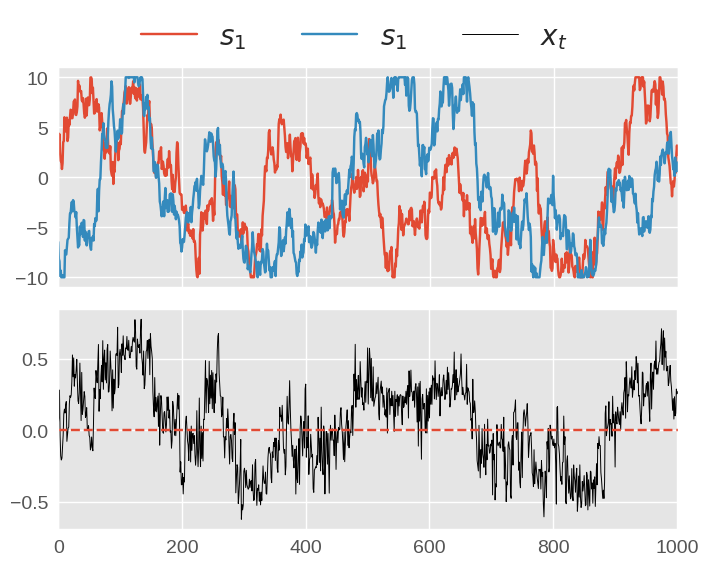

Membership functions (DGP):


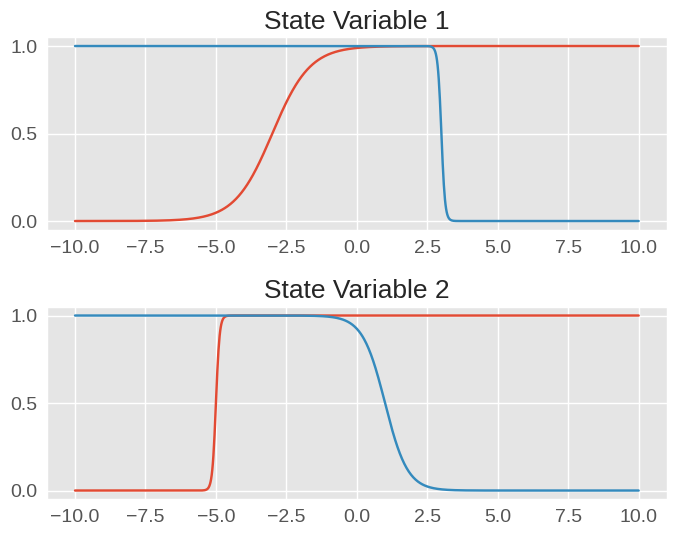

In [ ]:
# Load modules
import numpy as np
import torch
from sanfis import SANFIS, plottingtools
from sanfis.datagenerators import sanfis_generator

# seed for reproducibility
np.random.seed(3)
torch.manual_seed(3)
## Generate Data ##
S, S_train, S_valid, X, X_train, X_valid, y, y_train, y_valid, = sanfis_generator.gen_data_ts(
    n_obs=1000, test_size=0.33, plot_dgp=True)

In [ ]:
# list of membership functions
membfuncs = [
    {'function': 'sigmoid',
     'n_memb': 2,
     'params': {'c': {'value': [0.0, 0.0],
                      'trainable': True},
                'gamma': {'value': [-2.5, 2.5],
                          'trainable': True}}},

    {'function': 'bell',
			'n_memb': 2,
			'params': {'c': {'value': [-1.5, 1.5],
			                'trainable': True},
			            'a': {'value': [3.0, 1.0],
			                'trainable': False},
			            'b': {'value': [1.0, 3.0],
			                'trainable': False}}}
]

Train s-anfis on 670 samples, validate on 330 samples


Training Loop: 100%|##########| 1000.0/1000 [01:21<00:00, 12.21epochs/s, train_loss=0.202, valid_loss=0.241]


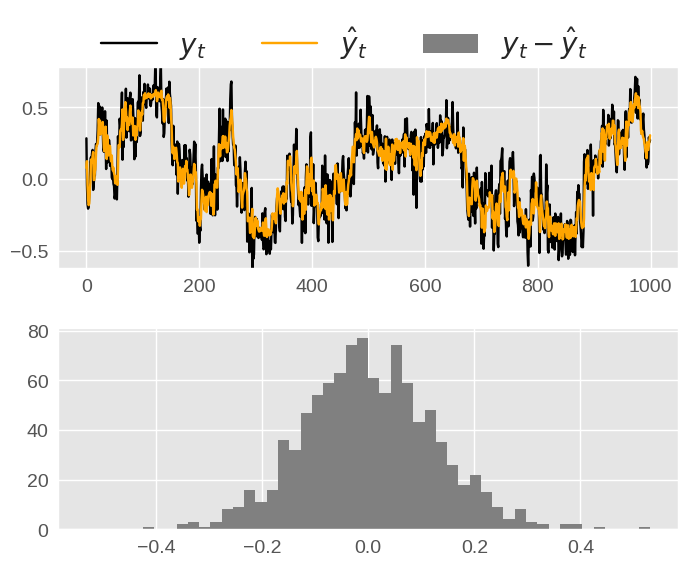

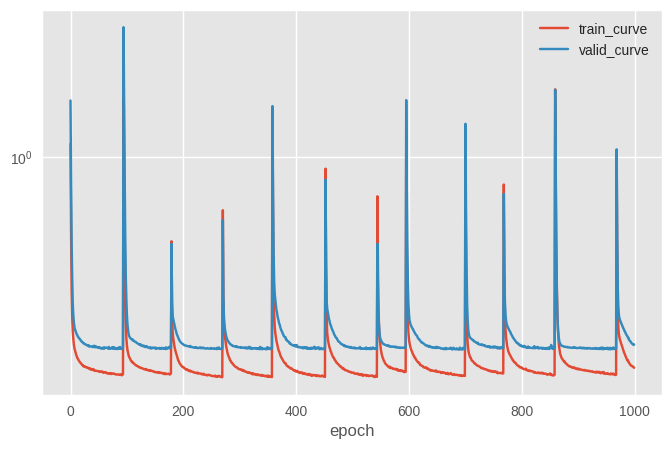

In [ ]:
# make model / set loss function and optimizer
fis = SANFIS(membfuncs=membfuncs, n_input=2, scale='Std')
loss_function = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(fis.parameters(), lr=0.005)

# fit model
history = fis.fit([S_train, X_train, y_train], [S_valid, X_valid, y_valid],
                  optimizer, loss_function, epochs=1000)
# eval model
y_pred = fis.predict([S, X])
plottingtools.plt_prediction(y, y_pred)
plottingtools.plt_learningcurves(history)